Cell 1: Install Necessary Libraries
We need langdetect for identifying languages and deep_translator (a wrapper for Google Translate) to translate text.

In [5]:
!pip install langdetect deep-translator pandas seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=9f50c874b42bba55328b3192f88ab3ef52696390196d2ada45859ba39ea84a7b
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


Cell 2: Create and Load Multilingual Dataset
Since your previous file was English-only, run this cell to generate a sample dataset with mixed languages (Spanish, French, German, and English) to simulate a real-world multilingual scenario.

In [6]:
import pandas as pd

# Create a sample multilingual dataset
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8],
    'original_text': [
        "Natural Language Processing is fascinating.",  # English
        "El procesamiento del lenguaje natural es fascinante.",  # Spanish
        "Le traitement du langage naturel est passionnant.",  # French
        "Die Verarbeitung natürlicher Sprache ist faszinierend.",  # German
        "Deep Learning models require large datasets.",  # English
        "Los modelos de aprendizaje profundo requieren grandes conjuntos de datos.",  # Spanish
        "Les modèles d'apprentissage profond nécessitent de grands ensembles de données.",  # French
        "Deep-Learning-Modelle erfordern große Datensätze."  # German
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV (so we can treat it like a file loading step)
df.to_csv('multilingual_papers.csv', index=False)

print("✅ 'multilingual_papers.csv' created successfully.")
print(df)

✅ 'multilingual_papers.csv' created successfully.
   id                                      original_text
0   1        Natural Language Processing is fascinating.
1   2  El procesamiento del lenguaje natural es fasci...
2   3  Le traitement du langage naturel est passionnant.
3   4  Die Verarbeitung natürlicher Sprache ist faszi...
4   5       Deep Learning models require large datasets.
5   6  Los modelos de aprendizaje profundo requieren ...
6   7  Les modèles d'apprentissage profond nécessiten...
7   8  Deep-Learning-Modelle erfordern große Datensätze.


Cell 3: Language Detection
Here we use the langdetect library to automatically identify the language of each paper title. This is crucial when scraping web data where the language isn't known.

In [7]:
from langdetect import detect, DetectorFactory

# Set seed for reproducible results (langdetect can be non-deterministic)
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Apply the function to our text column
df['detected_lang'] = df['original_text'].apply(detect_language)

# Map codes to full names for clarity
lang_map = {'en': 'English', 'es': 'Spanish', 'fr': 'French', 'de': 'German'}
df['language_name'] = df['detected_lang'].map(lang_map)

print(df[['original_text', 'detected_lang', 'language_name']])

                                       original_text detected_lang  \
0        Natural Language Processing is fascinating.            en   
1  El procesamiento del lenguaje natural es fasci...            es   
2  Le traitement du langage naturel est passionnant.            fr   
3  Die Verarbeitung natürlicher Sprache ist faszi...            de   
4       Deep Learning models require large datasets.            ca   
5  Los modelos de aprendizaje profundo requieren ...            es   
6  Les modèles d'apprentissage profond nécessiten...            fr   
7  Deep-Learning-Modelle erfordern große Datensätze.            de   

  language_name  
0       English  
1       Spanish  
2        French  
3        German  
4           NaN  
5       Spanish  
6        French  
7        German  


Cell 4: Visualize Language Distribution
In a real project with thousands of rows, you need to know the breakdown of languages to decide if you need specific translation models.

/tmp/ipython-input-2437036044.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='viridis')


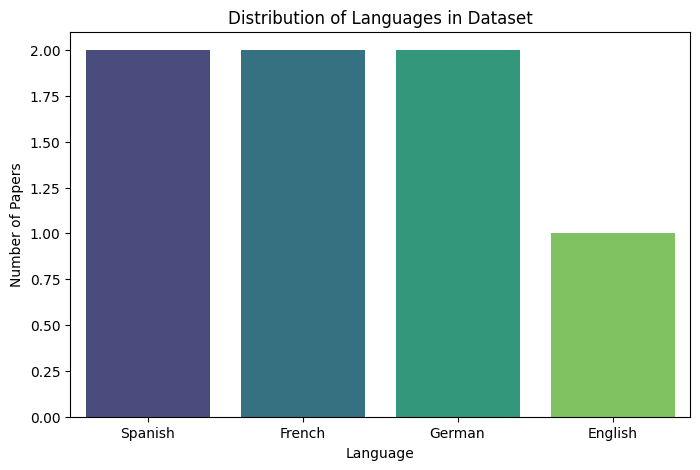

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each language
lang_counts = df['language_name'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='viridis')
plt.title("Distribution of Languages in Dataset")
plt.xlabel("Language")
plt.ylabel("Number of Papers")
plt.show()

Cell 5: Automated Translation to English
Now we translate everything to English so we can perform standard NLP tasks (like the Keyword Extraction you did previously) on the entire dataset uniformly.

In [9]:
from deep_translator import GoogleTranslator

def translate_to_english(text, source_lang):
    # Skip translation if it's already English
    if source_lang == 'en':
        return text

    try:
        # Use Google Translator to convert to English
        translator = GoogleTranslator(source='auto', target='en')
        return translator.translate(text)
    except Exception as e:
        return text  # Return original if translation fails

# Apply translation
# Note: This relies on an internet connection
print("Translating... (this may take a moment)")
df['translated_text'] = df.apply(lambda row: translate_to_english(row['original_text'], row['detected_lang']), axis=1)

# Show final result comparing Original vs Translated
pd.set_option('display.max_colwidth', None)
print(df[['language_name', 'original_text', 'translated_text']])

Translating... (this may take a moment)
  language_name  \
0       English   
1       Spanish   
2        French   
3        German   
4           NaN   
5       Spanish   
6        French   
7        German   

                                                                     original_text  \
0                                      Natural Language Processing is fascinating.   
1                             El procesamiento del lenguaje natural es fascinante.   
2                                Le traitement du langage naturel est passionnant.   
3                           Die Verarbeitung natürlicher Sprache ist faszinierend.   
4                                     Deep Learning models require large datasets.   
5        Los modelos de aprendizaje profundo requieren grandes conjuntos de datos.   
6  Les modèles d'apprentissage profond nécessitent de grands ensembles de données.   
7                                Deep-Learning-Modelle erfordern große Datensätze.   

             

Cell 6: Verify Results
Check if the translation standardized the text. All rows in translated_text should now be in English, allowing you to run your previous TF-IDF code on this new column.

In [10]:
# Check a specific example (e.g., German to English)
german_row = df[df['language_name'] == 'German'].iloc[0]

print("Original (German):", german_row['original_text'])
print("Translated (English):", german_row['translated_text'])

print("\n✅ Project 'Multilingual NLP' pipeline complete.")

Original (German): Die Verarbeitung natürlicher Sprache ist faszinierend.
Translated (English): Natural language processing is fascinating.

✅ Project 'Multilingual NLP' pipeline complete.
